In [1]:
import datetime
from datetime import datetime

import numpy as np
import pandas as pd
import panel as pn
import seaborn as sns
import spotipy

from matplotlib import pyplot as plt
from dateutil import parser
from spotipy.oauth2 import SpotifyClientCredentials
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier






from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier



from sklearn.model_selection import cross_validate

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
from xgboost import cv
from xgboost import XGBClassifier
from xgboost import DMatrix
from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import urllib



#os.environ['SPOTIPY_CLIENT_ID'] = 'your client id'
#os.environ['SPOTIPY_CLIENT_SECRET' = 'your client secret'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

In [2]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [3]:
name = 'Strokes'
results = spotify.search(q='artist:' + name, type='artist')
uri = results['artists']['items'][0]['uri']
#uri ='4UioiunP4IapnvYS7fmJas'
results = spotify.artist_albums(uri, album_type='album')
albums = results['items']

albums_dict = {}
for i, album in enumerate(albums.__reversed__()):
    if album['name'] not in albums_dict.keys():
        albums_dict[album['name']] = album['uri']
      
albums_dict

{'Is This It': 'spotify:album:2yNaksHgeMQM9Quse463b5',
 'Room On Fire': 'spotify:album:3HFbH1loOUbqCyPsLuHLLh',
 'First Impressions Of Earth': 'spotify:album:6jb1VsNC9eH2A1PnHUZJkC',
 'Angles': 'spotify:album:6Jx4cGhWHewTcfKDJKguBQ',
 'Comedown Machine': 'spotify:album:4WnkQO4xD9ljQooB3VIxCV',
 'The New Abnormal': 'spotify:album:2xkZV2Hl1Omi8rk2D7t5lN'}

In [4]:
'''Select 3 albuns to proceed'''
pn.extension()
multi_select = pn.widgets.MultiSelect(name='Select up to three', value=[],
    options=list(albums_dict.keys()), size=8)

multi_select

MultiSelect(name='Select up to three', options=['Is This It', ...], size=8)

In [5]:
multi_select.value

['Room On Fire', 'Angles', 'Comedown Machine']

In [6]:
for value in list(albums_dict):
    if value not in multi_select.value:
        albums_dict.pop(value, 'No Key found')
        
albums_dict

{'Room On Fire': 'spotify:album:3HFbH1loOUbqCyPsLuHLLh',
 'Angles': 'spotify:album:6Jx4cGhWHewTcfKDJKguBQ',
 'Comedown Machine': 'spotify:album:4WnkQO4xD9ljQooB3VIxCV'}

In [7]:
tracks_dict = {}
for key in albums_dict:
    for track in spotify.album_tracks(albums_dict[key])['items']:
        tracks_dict[track['id']] = key
        
tracks_dict

{'78Gzxi27GuNHTfkn2BylG4': 'Room On Fire',
 '57Xjny5yNzAcsxnusKmAfA': 'Room On Fire',
 '6DUKQUhWqUySYngLXLNwP2': 'Room On Fire',
 '6Yu1OL8I0D4vjOzYdsXYGK': 'Room On Fire',
 '6lnnaGN20kl0jEYJSxCgU9': 'Room On Fire',
 '5OmumaYiHYXUsYZPGLFTYJ': 'Room On Fire',
 '08l9WKDuRyGeStQ9ojTlFh': 'Room On Fire',
 '3kKb3U3a8jmUJQB9ypE1Jl': 'Room On Fire',
 '5MZBOcqI3Vpvp2PZy6ddyD': 'Room On Fire',
 '0dy6iXYIF0piirySAzCBwF': 'Room On Fire',
 '7eX5SypK35V8Y9d9pS6rWy': 'Room On Fire',
 '6mVD1SfTvlFAPVi7txFL5H': 'Angles',
 '6u0x5ad9ewHvs3z6u9Oe3c': 'Angles',
 '10rOqbOBlAJybglgmqaMZL': 'Angles',
 '22iKX3jvZwZNW7RlrwQ822': 'Angles',
 '6SdAztAqklk1zAmUHhU4N7': 'Angles',
 '5pFSbiW5XewiQONONBQbqF': 'Angles',
 '6z5mh42xSM54RncKZMM8hS': 'Angles',
 '69YCkfZS0aOjEUPwQ4zCZ9': 'Angles',
 '08Bkl20GdNhlh7UdUcee2r': 'Angles',
 '4ileLT7ldd2uX8bMemWqbm': 'Angles',
 '2ThdB23G9Rgf1ExndFGEEg': 'Comedown Machine',
 '7uFZNMEZzAGOwQ6EZID1K4': 'Comedown Machine',
 '5GKVcvTgnFYtfh25qKQtRg': 'Comedown Machine',
 '7bfocP7GYoLOut

In [8]:
'''
Now we need the ID of some track just to retrieve the available parameters list.
'''

track_name = 'as it was' #input('Type the name of any track:')

try:
    results = spotify.search(q='track:' + track_name, type='track')
    items = results['tracks']['items']
    track_id = items[0]['id']
except:
    raise Exception('Could not find any track with this name. Try again!')

print(f'''\nFirst result is "{items[0]['name']}" by "{items[0]['artists'][0]['name']}". The ID is: {track_id}''')



First result is "As It Was" by "Harry Styles". The ID is: 4LRPiXqCikLlN15c3yImP7


In [9]:
parameters = list(spotify.audio_features(tracks=track_id)[0].keys())
parameters

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [10]:
unwanted = ['type','id','uri','track_href','analysis_url']
parameters = [parameter for parameter in parameters if parameter not in unwanted]
parameters

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [11]:
for j, key in enumerate(tqdm(tracks_dict)):
    if j==419:
        print(key)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 266834.45it/s]


In [12]:
features_dict = {}
for j, key in enumerate(tqdm(tracks_dict)):
    try:
        features_dict[j] = {}
        features_dict[j]['album'] = tracks_dict[key]
        track_features = spotify.audio_features(tracks=key)[0]
        for parameter in parameters:
            features_dict[j][parameter] = track_features[parameter]
    except:
        del features_dict[j]
        pass

#features_dict

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:06<00:00,  4.68it/s]


In [13]:
features_dict

{0: {'album': 'Room On Fire',
  'danceability': 0.547,
  'energy': 0.596,
  'key': 11,
  'loudness': -6.044,
  'mode': 1,
  'speechiness': 0.0339,
  'acousticness': 8.02e-05,
  'instrumentalness': 0.739,
  'liveness': 0.273,
  'valence': 0.584,
  'tempo': 116.17,
  'duration_ms': 169507,
  'time_signature': 4},
 1: {'album': 'Room On Fire',
  'danceability': 0.489,
  'energy': 0.649,
  'key': 9,
  'loudness': -5.11,
  'mode': 1,
  'speechiness': 0.0336,
  'acousticness': 0.000603,
  'instrumentalness': 0.713,
  'liveness': 0.101,
  'valence': 0.77,
  'tempo': 158.009,
  'duration_ms': 219827,
  'time_signature': 4},
 2: {'album': 'Room On Fire',
  'danceability': 0.675,
  'energy': 0.535,
  'key': 1,
  'loudness': -6.109,
  'mode': 1,
  'speechiness': 0.0376,
  'acousticness': 0.00329,
  'instrumentalness': 0.719,
  'liveness': 0.104,
  'valence': 0.914,
  'tempo': 105.921,
  'duration_ms': 207133,
  'time_signature': 4},
 3: {'album': 'Room On Fire',
  'danceability': 0.451,
  'energy

In [14]:
df0 = pd.DataFrame(features_dict).T
#df0.drop(['energy','loudness','key','time_signature'],axis=1,inplace=True)
df0.tail()

,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
27,Comedown Machine,0.664,0.646,9,-7.934,1,0.0284,0.0658,0.28,0.0954,0.5,131.993,260693,4
28,Comedown Machine,0.538,0.951,7,-4.741,1,0.0606,0.000934,0.0545,0.239,0.551,106.033,201893,4
29,Comedown Machine,0.561,0.569,6,-9.682,1,0.0289,0.365,0.611,0.109,0.53,103.705,216787,4
30,Comedown Machine,0.626,0.831,2,-7.743,1,0.0369,0.00571,0.0188,0.355,0.255,113.999,172160,4
31,Comedown Machine,0.544,0.241,4,-14.779,0,0.03,0.983,0.774,0.101,0.359,109.437,204773,4


In [15]:
categorical_features = ['key', 'mode', 'time_signature']
df = df0.copy()
for feature in categorical_features:
    dummies = pd.get_dummies(df0[feature], prefix=feature)
    df = pd.concat([df.drop([feature], axis=1), dummies], axis=1)   

df.tail()

/home/hcsg/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/home/hcsg/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/home/hcsg/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_5,key_6,key_7,key_8,key_9,key_11,mode_0,mode_1,time_signature_3,time_signature_4
27,Comedown Machine,0.664,0.646,-7.934,0.0284,0.0658,0.28,0.0954,0.5,131.993,...,0,0,0,0,1,0,0,1,0,1
28,Comedown Machine,0.538,0.951,-4.741,0.0606,0.000934,0.0545,0.239,0.551,106.033,...,0,0,1,0,0,0,0,1,0,1
29,Comedown Machine,0.561,0.569,-9.682,0.0289,0.365,0.611,0.109,0.53,103.705,...,0,1,0,0,0,0,0,1,0,1
30,Comedown Machine,0.626,0.831,-7.743,0.0369,0.00571,0.0188,0.355,0.255,113.999,...,0,0,0,0,0,0,0,1,0,1
31,Comedown Machine,0.544,0.241,-14.779,0.03,0.983,0.774,0.101,0.359,109.437,...,0,0,0,0,0,0,1,0,0,1


In [16]:
for column in df.columns:
    print(df.loc[pd.isna(df[column]), :].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [17]:
df.dropna(inplace=True)
for column in df.columns:
    print(df.loc[pd.isna(df[column]), :].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [18]:
df['album'].unique()

array(['Room On Fire', 'Angles', 'Comedown Machine'], dtype=object)

In [19]:
unwanted_albums = ['Favourite Worst Nightmare (Standard Version)', 'Live at the Royal Albert Hall']

for unwanted_album in unwanted_albums:
    df.drop(df[df['album'] == unwanted_album].index, inplace=True)
    
df['album'].unique()

array(['Room On Fire', 'Angles', 'Comedown Machine'], dtype=object)

In [20]:
def make_heatmap(df):
    mask = np.triu(np.ones_like(df.corr().abs(), dtype=np.bool))
    with sns.axes_style('white'):
        sns.heatmap(df.corr().abs(), cmap='BrBG', mask=mask, vmin=-1, vmax=1)

/tmp/ipykernel_1470/3605427709.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr().abs(), dtype=np.bool))


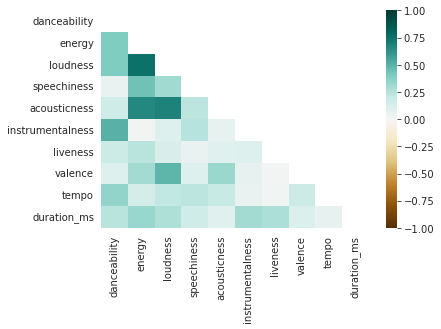

In [21]:
base_df = df.iloc[:,1:11].astype('float')
make_heatmap(base_df)

/tmp/ipykernel_1470/3605427709.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr().abs(), dtype=np.bool))


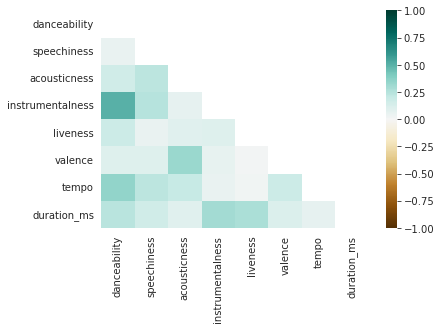

In [22]:
base_df.drop(['energy','loudness'], axis=1, inplace=True)
make_heatmap(base_df)

In [30]:
X = df.iloc[:,1:]
scaler_X = StandardScaler()
scaler = scaler_X.fit(X)
X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(columns=X.columns,data=X_scaled)
y = df.iloc[:,:1]
le = LabelEncoder()

y = le.fit_transform(y.values.ravel())
y = y.astype(np.float64)
x = X_scaled.iloc[:,:].to_numpy()
y_ = y.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

while True:
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)
    sum_split = pd.DataFrame(test_y).sum()
    if sum_split.max() - sum_split.min() < 2:
        break



In [31]:
sum_split
# train_y_decoded = tmp_df.apply(lambda x: x.argmax(), axis=1).values

0    2.0
1    3.0
2    2.0
dtype: float64

In [32]:
'''
Comparing Classifiers

'''
classifiers_1 = [
    XGBClassifier(n_estimators=100),
    DecisionTreeClassifier(max_depth=200),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42),
    ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0),  
    KNeighborsClassifier(3)
]

classifiers_2 = [
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=.1),
    GradientBoostingClassifier(learning_rate=0.1, random_state=10),
    HistGradientBoostingClassifier(max_iter=100)
]

for classifier in classifiers_1:
    print(str(classifier))
    classifier.fit(train_x,train_y)
    ypred=classifier.predict(test_x)
    result1 = classification_report(test_y, ypred)
    print (result1)
    result2 = accuracy_score(test_y,ypred)
    print('Accuracy:',result2)
    
tmp_df = pd.DataFrame(train_y)
train_y_decoded = tmp_df.apply(lambda x: x.argmax(), axis=1).values
tmp_df = pd.DataFrame(test_y)
test_y_decoded = tmp_df.apply(lambda x: x.argmax(), axis=1).values
    
for classifier in classifiers_2:
    
    print(str(classifier))
    classifier.fit(train_x,train_y_decoded)
    ypred=classifier.predict(test_x)
    tmp_df = pd.DataFrame(ypred,columns=['album'])
    ypred_encoded = pd.get_dummies(tmp_df['album']).to_numpy()
    result1 = classification_report(test_y, ypred_encoded)
    print (result1)
    result2 = accuracy_score(test_y,ypred_encoded)
    print('Accuracy:',result2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         3
           2       0.67      1.00      0.80         2

   micro avg       0.75      0

/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hcsg/anaconda3/lib/python3.9/si

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00         2

   micro avg       0.75      0.43      0.55         7
   macro avg       0.50      0.50      0.50         7
weighted avg       0.43      0.43      0.43         7
 samples avg       0.43      0.43      0.43         7

Accuracy: 0.42857142857142855
ExtraTreesClassifier(n_estimators=10, random_state=0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00         2

   micro avg       1.00      0.57      0.73         7
   macro avg       0.67      0.67      0.67         7
weighted avg       0.57      0.57      0.57         7
 samples avg       0.57      0.57      0.57         7

Accuracy: 0.5714285714285714
KNeighborsClassif

/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.33      0.40         3
           2       0.67      1.00      0.80         2

   micro avg       0.57      0.57      0.57         7
   macro avg       0.56      0.61      0.57         7
weighted avg       0.55      0.57      0.54         7
 samples avg       0.57      0.57      0.57         7

Accuracy: 0.5714285714285714
GradientBoostingClassifier(random_state=10)


ValueError: Multi-label binary indicator input with different numbers of labels

/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


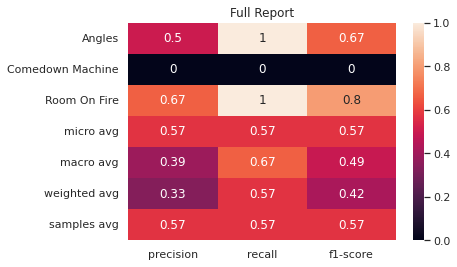

In [33]:
'''Choosing Decision Trees'''

train_x = pd.DataFrame(train_x,columns=df.columns.values[1:])
test_x = pd.DataFrame(test_x,columns=df.columns.values[1:])

clf = DecisionTreeClassifier(max_depth=200)
clf.fit(train_x,train_y)
ypred=clf.predict(test_x)
result1 = classification_report(test_y, ypred, output_dict=True)

df_report = pd.DataFrame(result1).iloc[:-1, :].T

keys_encoded = list(result1.keys())[:-4]
keys_encoded = [int(key_encoded) for key_encoded in keys_encoded]
df_report.index = pd.concat([pd.Series(le.inverse_transform(keys_encoded)),
                             pd.Series(list(result1.keys())[-4:])])
                            
sns.reset_orig()
with sns.axes_style('white'):
    a = sns.set(rc={})
    plt.title('Full Report')
    sns.heatmap(df_report, annot=True)


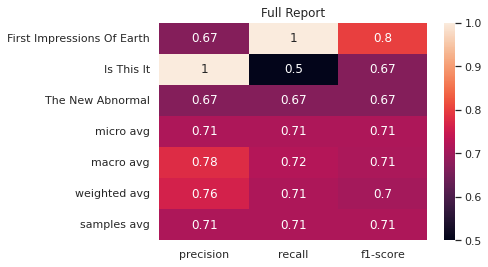

In [25]:
# '''Choosing Gradient Boost Trees'''

# train_x = pd.DataFrame(train_x,columns=df.columns.values[1:])
# test_x = pd.DataFrame(test_x,columns=df.columns.values[1:])

# clf = GradientBoostingClassifier(random_state=10)
# clf.fit(train_x,train_y_decoded)
# ypred=clf.predict(test_x)
# tmp_df = pd.DataFrame(ypred,columns=['album'])
# ypred_encoded = pd.get_dummies(tmp_df['album']).to_numpy()
# result1 = classification_report(test_y, ypred_encoded, output_dict=True)

# df_report = pd.DataFrame(result1).iloc[:-1, :].T

# keys_encoded = list(result1.keys())[:-4]
# keys_encoded = [int(key_encoded) for key_encoded in keys_encoded]
# df_report.index = pd.concat([pd.Series(le.inverse_transform(keys_encoded)),
#                              pd.Series(list(result1.keys())[-4:])])
                            
# sns.reset_orig()
# with sns.axes_style('white'):
#     a = sns.set(rc={})
#     plt.title('Full Report')
#     sns.heatmap(df_report, annot=True)


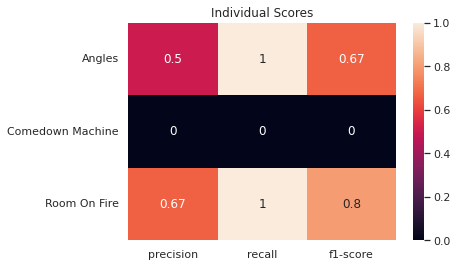

In [34]:
df_report = pd.DataFrame(result1).iloc[:-1, :-4].T

keys_encoded = list(result1.keys())[:-4]
keys_encoded = [int(key_encoded) for key_encoded in keys_encoded]
df_report.index = pd.Series(le.inverse_transform(keys_encoded))                     

sns.reset_orig()
with sns.axes_style('white'):
    a = sns.set(rc={})
    plt.title('Individual Scores')
    sns.heatmap(df_report, annot=True)

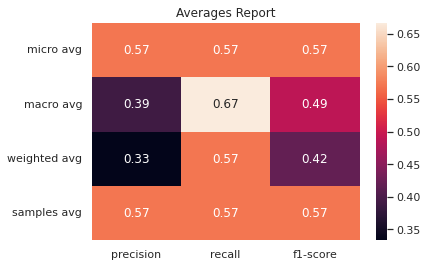

In [35]:
end_report = pd.DataFrame(result1).iloc[:-1, -4:].T
sns.reset_orig()
with sns.axes_style('white'):
    a = sns.set(rc={})
    plt.title('Averages Report')
    sns.heatmap(end_report, annot=True)

In [ ]:
# '''
# you'll probably need to sudo apt-get install graphviz
# '''

# import matplotlib.pyplot as plt

# xgb.plot_tree(clf,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 50]
# plt.show()

# '''
# still need to decode this leaf
# '''

In [ ]:
# with plt.style.context('Solarize_Light2'):  
#     plt.rcParams['figure.figsize'] = [5,5]
#     xgb.plot_importance(clf)
    
#     plt.show()

In [46]:
#probably a better way to do this
pn.extension()
danceability = pn.widgets.FloatSlider(
    name='danceability', 
    start=df0['danceability'].min(), 
    end=df0['danceability'].max(), 
    step=0.01, 
    value=df0['danceability'].mean()
)
energy = pn.widgets.FloatSlider(
    name='energy', 
    start=df0['energy'].min(), 
    end=df0['energy'].max(), 
    step=0.01, 
    value=df0['energy'].mean()
)
loudness = pn.widgets.FloatSlider(
    name='loudness', 
    start=df0['loudness'].min(),
    end=df0['loudness'].max(), 
    step=0.01, 
    value=df0['loudness'].mean()
)
speechiness = pn.widgets.FloatSlider(
    name='speechiness', 
    start=df0['speechiness'].min(), 
    end=df0['speechiness'].max(), 
    step=0.01, 
    value=df0['speechiness'].mean()
)
acousticness = pn.widgets.FloatSlider(
    name='acousticness', 
    start=df0['acousticness'].min(), 
    end=df0['acousticness'].max(), 
    step=0.01, 
    value=df0['acousticness'].mean()
)
instrumentalness = pn.widgets.FloatSlider(
    name='instrumentalness', 
    start=df0['instrumentalness'].min(), 
    end=df0['instrumentalness'].max(), 
    step=0.01, 
    value=df0['instrumentalness'].mean()
)
liveness = pn.widgets.FloatSlider(
    name='liveness', 
    start=df0['liveness'].min(), 
    end=df0['liveness'].max(), 
    step=0.01, 
    value=df0['liveness'].mean()
)
valence = pn.widgets.FloatSlider(
    name='valence', 
    start=df0['valence'].min(), 
    end=df0['valence'].max(), 
    step=0.01, 
    value=df0['valence'].mean()
)
tempo = pn.widgets.FloatSlider(
    name='tempo', 
    start=df0['tempo'].min(), 
    end=df0['tempo'].max(), 
    step=1, 
    value=df0['tempo'].mean()
)
duration_min = pn.widgets.FloatSlider(
    name='duration_min', 
    start=df0['duration_ms'].min()/60000, 
    end=df0['duration_ms'].max()/60000, 
    step=0.1, 
    value=df0['duration_ms'].mean()/60000
)
key = pn.widgets.DiscreteSlider(
    name='key', 
    options={'C':0,'Db':1,'D':2,'Eb':3,'E':4,'F':5,'Gb':6,'G':7,'Ab':8,'A':9,'Bb':10,'B':11}, 
    value='C'
)
mode = pn.widgets.DiscreteSlider(
    name='mode', 
    options={'Minor':0,'Major':1}, 
    value='Minor'
)
time_signature = pn.widgets.DiscreteSlider(
    name='time_signature', 
    options={'3/4':3,'4/4':4,'5/4':5,'6/4':6,'7/4':7}, 
    value='4/4'
)
print('Make a prediction!')
pn.Column(danceability, energy, loudness, speechiness, acousticness, instrumentalness,
          liveness, valence, tempo, duration_min, key, mode, time_signature,
          background = 'white')

Make a prediction!


Column(background='white')
    [0] FloatSlider(end=0.737, name='danceability', start=0.304, step=0.01, value=0.5331875)
    [1] FloatSlider(end=0.971, name='energy', start=0.241, step=0.01, value=0.73840625)
    [2] FloatSlider(end=-2.593, name='loudness', start=-14.779, step=0.01, value=-5.9401874999999995)
    [3] FloatSlider(end=0.0745, name='speechiness', start=0.0255, step=0.01, value=0.039293749999999995)
    [4] FloatSlider(end=0.983, name='acousticness', start=4.16e-05, step=0.01, value=0.097891746875)
    [5] FloatSlider(end=0.955, name='instrumentalness', start=1.49e-05, step=0.01, value=0.4648584343750001)
    [6] FloatSlider(end=0.558, name='liveness', start=0.0541, step=0.01, value=0.15798750000000003)
    [7] FloatSlider(end=0.964, name='valence', start=0.078, step=0.01, value=0.5706249999999999)
    [8] FloatSlider(end=199.866, name='tempo', start=91.336, step=1, value=127.46778125)
    [9] FloatSlider(end=4.976883333333333, name='duration_min', start=2.362216666666667, value=3.3506109375)
    [10] DiscreteSlider(formatter='%d', name='key', options={'C': 0, 'Db': 1, ...}, value=0)
    [11] DiscreteSlider(formatter='%d', name='mode', options={'Minor': 0, 'Major': 1}, value=0)
    [12] DiscreteSlider(formatter='%d', name='time_signature', options={'3/4': 3, '4/4': 4, ...}, value=3)

In [41]:
#creating new data dict from inputted values

new_data_raw = {
    'danceability': danceability.value,
    'energy': energy.value,
    'key': key.value,
    'loudness': loudness.value,
    'mode': mode.value,
    'speechiness': speechiness.value,
    'acousticness': acousticness.value,
    'instrumentalness': instrumentalness.value,
    'liveness': liveness.value,
    'valence': valence.value,
    'tempo': tempo.value,
    'duration_ms': duration_min.value*60000,
    'time_signature': time_signature.value
}

new_data_raw[f'key_{key.value}'] = 1
new_data_raw[f'mode_{mode.value}'] = 1
new_data_raw[f'time_signature_{time_signature.value}'] = 1
new_data_raw.pop('key', 'No Key found')
new_data_raw.pop('mode', 'No Key found')
new_data_raw.pop('time_signature', 'No Key found')

7

In [42]:
dfx = pd.DataFrame(new_data_raw, index=[0], columns=test_x.columns).fillna(0)
arr = dfx.values
a = scaler.transform(arr)
new_data_df = pd.DataFrame(a, index=[0], columns= test_x.columns)

new_data_pred = clf.predict(new_data_df)
new_data_pred[0]

#assert new_data_pred.sum() == 1, 'too wild of an input'

/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0., 1., 0.])

In [43]:
result1.keys()

keys_encoded = list(result1.keys())[:-4]
keys_encoded = [int(key_encoded) for key_encoded in keys_encoded]
df_report.index = pd.Series(le.inverse_transform(keys_encoded)) 

The song you have in mind would probably be in Comedown Machine!


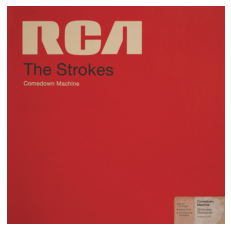

In [44]:
try: #from classifier_1 list
    predicted_album = le.inverse_transform(new_data_pred[0].astype('bool'))
    pred_uri = albums_dict[predicted_album[0]]
except: #from classifier_2 list
    predicted_album = le.inverse_transform(list(new_data_pred))
    pred_uri = albums_dict[predicted_album[0]]

url = spotify.albums([pred_uri])['albums'][0]['images'][0]['url']

f = urllib.request.urlopen(url)
a = plt.imread(f, format='jpg')

print(f'The song you have in mind would probably be in {predicted_album[0]}!')

#plt.figure(figsize = (15,15))
plt.axis('off')
_ = plt.imshow(a)
